## MCP9808 Temperature Sensor  
The MCP9808 is a digitial temperature sensor with an accuracy of +/-0.25 C, a working range of -40 to 125 C and a precision of +0.0625 C.  

Manufacturer Link: https://www.microchip.com/wwwproducts/en/en556182

Breakout Board Used: https://www.adafruit.com/product/1782

In [1]:
import matplotlib.pyplot as plt

from meerkat import mcp9808, parser

Select I2C bus and instance device class.  Note I2C bus is 1 on Raspberry Pi.

In [2]:
dev = mcp9808.MCP9808(bus_n=1)

#### Configuration

In [3]:
dev.get_status()
dev.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


#### Measurement

In [4]:
dev.get_temp()

21.25

In [5]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 21.25],
 ['test_1', 2, 21.25],
 ['test_1', 3, 21.25],
 ['test_1', 4, 21.25],
 ['test_1', 5, 21.25]]

In [6]:
# writer method with description and sample number
dev.write(description='test_2', n=30)

#### CSV Writer Output

In [7]:
dev.writer.path

'2019_06_04_07_44_27_data.csv'

In [8]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.writer.path)

In [9]:
df.head()

,std_time_ms,description,sample_n,temperature,datetime64_ns
0,2019-06-04 07:44:27.111671,test_2,1,21.25,2019-06-04 07:44:27.111671
1,2019-06-04 07:44:27.115741,test_2,2,21.25,2019-06-04 07:44:27.115741
2,2019-06-04 07:44:27.124099,test_2,3,21.25,2019-06-04 07:44:27.124099
3,2019-06-04 07:44:27.126433,test_2,4,21.25,2019-06-04 07:44:27.126433
4,2019-06-04 07:44:27.128691,test_2,5,21.25,2019-06-04 07:44:27.128691


In [10]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

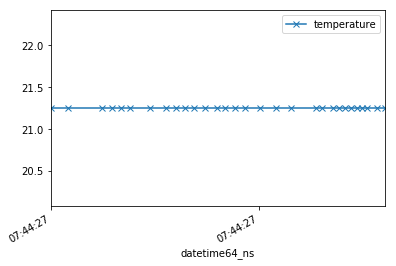

In [11]:
df[["datetime64_ns", 
    "temperature"]].plot(x="datetime64_ns", style='-x');

In [12]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 372.8932 Hz


In [13]:
m

{'accuracy': None,
 'bytes': None,
 'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'description': None,
 'device': {'accuracy': '+/-0.25 (typical) C',
  'active': None,
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0x6e8a71f0>',
  'calibration_date': None,
  'description': '+/-0.5 degrees Celcius maximum accuracy digital temperature sensor',
  'dtype': None,
  'error': None,
  'manufacturer': 'Microchip',
  'name': 'MCP9808',
  'precision': '0.0625 C maximum',
  'state': None,
  'units': 'Degrees Celcius',
  'urls': 'https://www.microchip.com/datasheet/MCP9808',
  'version_hw': '0.1',
  'version_sw': '0.1'},
 'double_quote': True,
 'dtypes': None,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': None,
 'hash': None,
 'header': ['description', 'sample_n', 'temperature'],
 'licenses': None,
 'line_terminator': '\n',
 'media_type': 'text/csv',
 'name': 'MCP9808',
 'null_sequence': 'NA',
 'path': '2019_06_04_07_44_27_data.csv',
 'precision': None,
 'quote_char': '

### File Save Test
Ambient temperature is approximately 23 degrees C

#### JSON Writer Output

In [14]:
# reinitialize to JSON output
dev = mcp9808.MCP9808(bus_n=1, output='json')
dev.writer.metadata_interval = 3

In [15]:
# writing method with description and sample number
dev.write(description='test_4', n=5)

In [16]:
# show first lines of JSON text file
with open(dev.writer.path, 'r') as f:
    for n in range(5):
        print(f.readline())

{"description": "test_4", "std_time_ms": "2019-06-04 07:44:29.122041", "temperature": 21.25, "sample_n": 1}

{"description": "test_4", "std_time_ms": "2019-06-04 07:44:29.124769", "temperature": 21.25, "sample_n": 2}

{"schema": null, "hash": null, "double_quote": true, "line_terminator": "\n", "standard": "RFC 8259", "strfmtime": "%Y-%m-%d %H:%M:%S.%f", "encoding": "utf-8", "quote_char": "\"", "path": "2019_06_04_07_44_29_JSON_data.txt", "temperature": 21.25, "comment": "#", "licenses": null, "dtypes": null, "sample_n": 3, "name": "MCP9808", "version": "0.1 Alpha", "null_sequence": "NA", "escape_char": "\\", "metadata_file_i": 0, "accuracy": null, "units": null, "precision": null, "metadata_interval": 3, "skip_lines": 0, "format": null, "media_type": "text/json", "sources": null, "std_time_ms": "2019-06-04 07:44:29.134372", "device": null, "description": null, "title": null, "metadata_stream_i": 1, "bytes": null, "header": ["description", "sample_n", "temperature"], "time_format": "st